In [241]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter

In [242]:
mu, Q, R = 0, 0.01, 0.001 # mean and standard deviation
n = 100
q = np.random.normal(mu, Q, size=(n,1,1))
r = np.random.normal(mu, Q, size=(n,1,1))


In [243]:
x=np.ones((1,1))
y=np.zeros((1,1))
A=np.array([[-0.8]])
H=np.array([[1]])
states=[]

x1=[]
x2=[]
x_real_1=[]
x_real_2=[]
y1=[]
y2=[]


In [244]:

for i in range(1,n):
    x = np.matmul(A,x) + q[i]
    y = np.matmul(H,x) + r[i]
    states.append(x)
    x1.append(x[0])
    y1.append(y[0])
    x_real_1.append(x[0]-q[i][0])

y1=np.array(y1)
y=y1


In [245]:
x_bar = np.zeros((1,1))*-2
xbar=[]
x_bar_1 = []
P = np.ones((n,1,1))*10

s=0
v=0
k=0   
S=[]
V=[]

for i in range(1,n-1):
    # Prediction Step
    x_bar = np.matmul(A,x_bar)
    x_bar_1.append(x_bar[0])
    P[i] = np.matmul(A,np.matmul(P[i-1],np.transpose(A))) + Q
    # Update Step
    s=np.matmul(H,np.matmul(P[i],np.transpose(H))) + R
    s=np.array(s)
    S.append(s)

    v=np.reshape(y[i],(1,1))-np.matmul(H,x_bar)
    V.append(v)
    
    a=np.linalg.inv(s)
    k=np.matmul(P[i],np.matmul(np.transpose(H),a))
    
    x_bar=x_bar+np.matmul(k,v)
    xbar.append(x_bar)

    P[i]=np.matmul(np.identity(1)-np.matmul(k,H),np.transpose(P[i]))
xbar1=[]
for i in range(len(xbar)):
    xbar1.append(xbar[i][0])
    
e=((xbar1-x[0])**2)**0.5
P=np.delete(P,-1)


In [246]:
print(np.shape(P))
print(P.min)

(99,)
[1.00000000e+01 9.99844018e-04 9.14088610e-04 9.13681609e-04
 9.13679668e-04 9.13679659e-04 9.13679659e-04 9.13679659e-04
 9.13679659e-04 9.13679659e-04 9.13679659e-04 9.13679659e-04
 9.13679659e-04 9.13679659e-04 9.13679659e-04 9.13679659e-04
 9.13679659e-04 9.13679659e-04 9.13679659e-04 9.13679659e-04
 9.13679659e-04 9.13679659e-04 9.13679659e-04 9.13679659e-04
 9.13679659e-04 9.13679659e-04 9.13679659e-04 9.13679659e-04
 9.13679659e-04 9.13679659e-04 9.13679659e-04 9.13679659e-04
 9.13679659e-04 9.13679659e-04 9.13679659e-04 9.13679659e-04
 9.13679659e-04 9.13679659e-04 9.13679659e-04 9.13679659e-04
 9.13679659e-04 9.13679659e-04 9.13679659e-04 9.13679659e-04
 9.13679659e-04 9.13679659e-04 9.13679659e-04 9.13679659e-04
 9.13679659e-04 9.13679659e-04 9.13679659e-04 9.13679659e-04
 9.13679659e-04 9.13679659e-04 9.13679659e-04 9.13679659e-04
 9.13679659e-04 9.13679659e-04 9.13679659e-04 9.13679659e-04
 9.13679659e-04 9.13679659e-04 9.13679659e-04 9.13679659e-04
 9.13679659e-04 9.

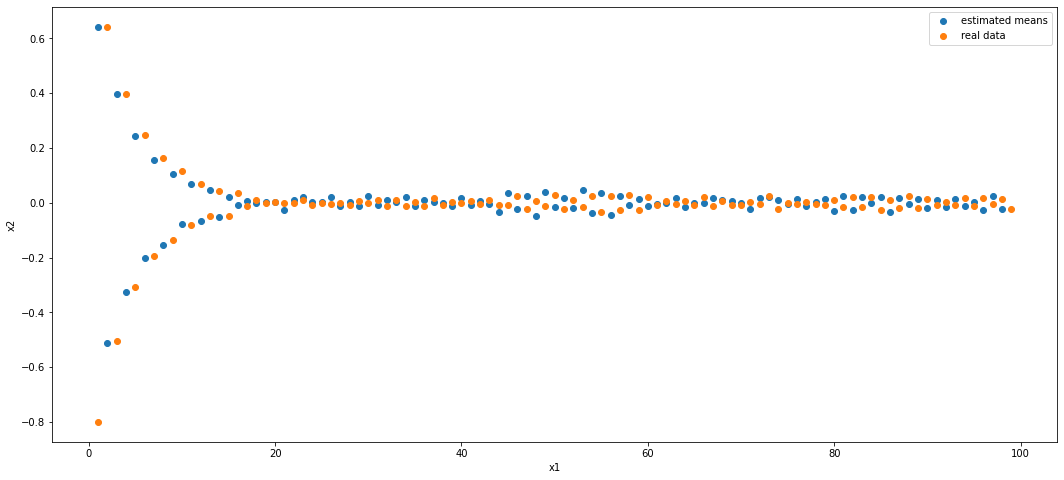

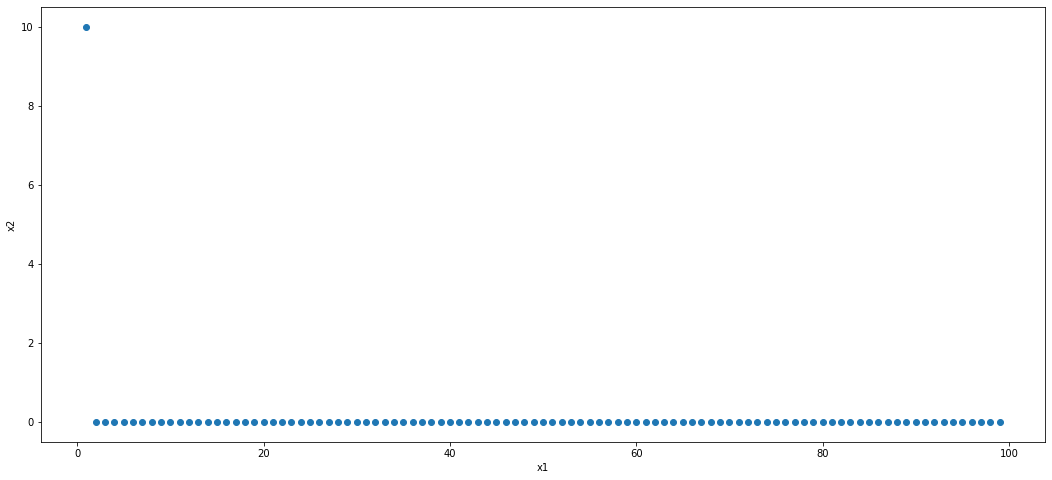

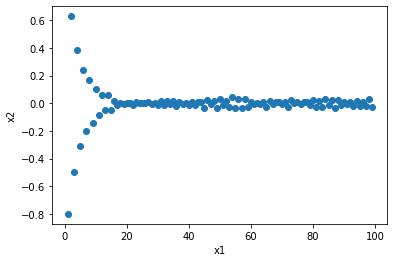

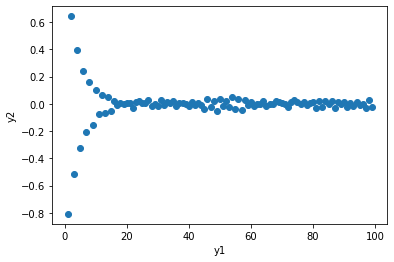

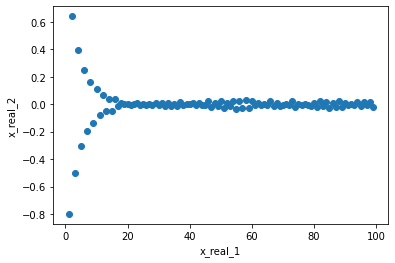

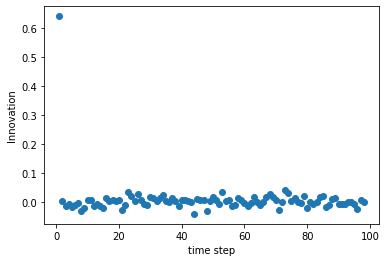

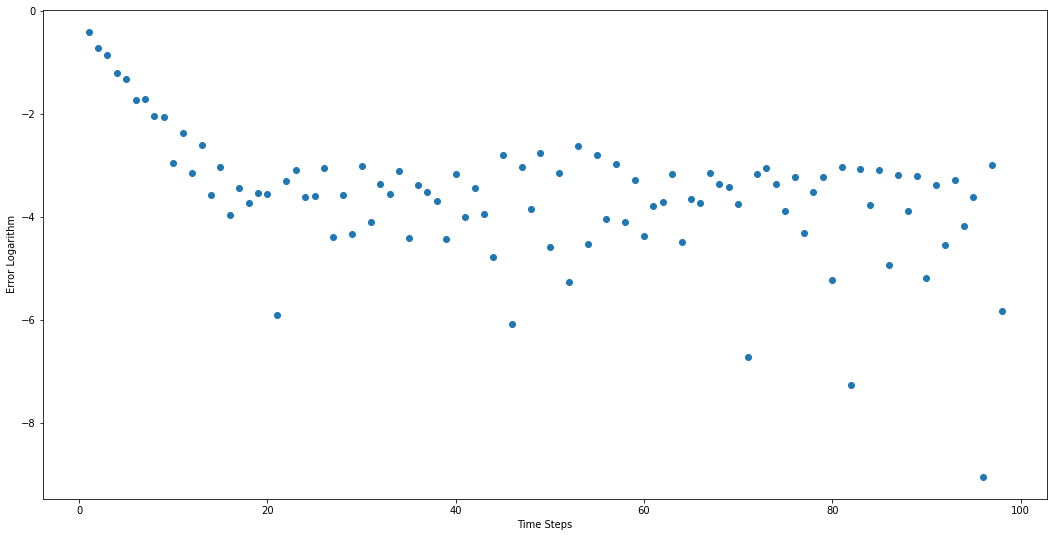

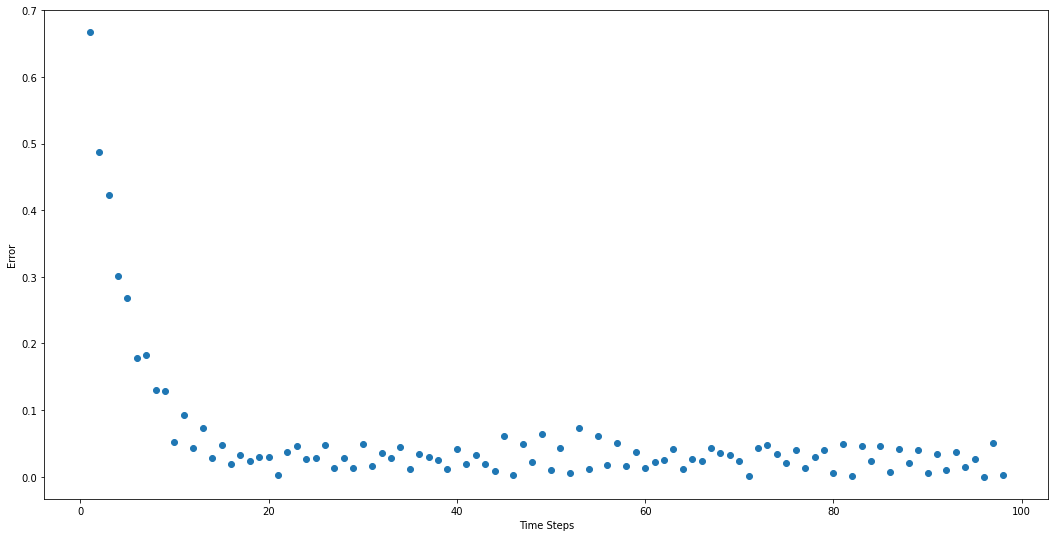

In [247]:


fig = plt.figure(figsize=(18,8))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("")
plt.scatter(np.reshape((np.arange(start=1,stop=np.shape(e)[0]+1)),np.shape(xbar1)),xbar1,label="estimated means")
plt.scatter(np.reshape((np.arange(start=1,stop=np.shape(e)[0]+1+1)),np.shape(x_real_1)),x_real_1,label="real data")
plt.legend()
plt.show() 

fig = plt.figure(figsize=(18,8))
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("")
plt.scatter(np.reshape((np.arange(start=1,stop=np.shape(P)[0]+1)),np.shape(P)),P,label="noisy data")
plt.show() 

fig = plt.figure()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("")
plt.scatter(np.reshape((np.arange(start=1,stop=np.shape(x1)[0]+1)),np.shape(x1)),x1,label="noisy data")
plt.show() 

fig = plt.figure()
plt.xlabel("y1")
plt.ylabel("y2")
plt.title("")
plt.scatter(np.reshape((np.arange(start=1,stop=np.shape(y1)[0]+1)),np.shape(y1)),y1,label="observations")
plt.show()

fig = plt.figure()
plt.xlabel("x_real_1")
plt.ylabel("x_real_2")
plt.title("")
plt.scatter(np.reshape((np.arange(start=1,stop=np.shape(x_real_1)[0]+1)),np.shape(x_real_1)),x_real_1,label="real data")
plt.show()

fig = plt.figure()
plt.xlabel("time step")
plt.ylabel("Innovation")
plt.title("")
plt.scatter(np.reshape((np.arange(start=1,stop=np.shape(V)[0]+1)),np.shape(V)),V,label="real data")
plt.show()

ln_e=np.log(e)

fig = plt.figure(figsize=(18,9))
plt.xlabel("Time Steps")
plt.ylabel("Error Logarithm")
plt.title("")
plt.scatter(np.reshape((np.arange(start=1,stop=np.shape(ln_e)[0]+1)),np.shape(e)),ln_e,label="real error")
plt.show()

fig = plt.figure(figsize=(18,9))
plt.xlabel("Time Steps")
plt.ylabel("Error")
plt.title("")
plt.scatter(np.reshape((np.arange(start=1,stop=np.shape(e)[0]+1)),np.shape(e)),e,label="real error")
plt.show()